In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Read data

In [2]:
df = pd.read_csv('stats.csv')
EDITED = False

In [3]:
df.head()

,time,sizex,sizey,sizez,filltype,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing,interactionlistmethod
0,2018-12-03T23:32:54.750661,0.005,0.01,0.005,full,1.000000,250000,2.84316,0.013806,0.008978,2.81298,0
1,2018-12-03T23:32:58.734194,0.005,0.01,0.005,full,1.000000,250000,3.04899,0.016442,0.010490,3.00952,0
2,2018-12-03T23:33:02.890560,0.005,0.01,0.005,full,1.000000,250000,2.86906,0.013673,0.009013,2.83881,0
3,2018-12-03T23:33:06.329319,0.005,0.01,0.005,clusters2,0.110592,27648,17.04430,0.042520,0.033066,16.96050,0
4,2018-12-03T23:33:23.968568,0.005,0.01,0.005,clusters2,0.110592,27648,16.76850,0.042704,0.032625,16.68450,0


## Cleanup

In [5]:
if EDITED:
    print("Not reapplying cleanup.")
else:
    EDITED = True
    # fill to percent
    df['fill'] = (df['fill']*100).astype(int)


## Laufzeit
Alle durchläufe, nur Trennung nach filltype

### Gesamtlaufzeit

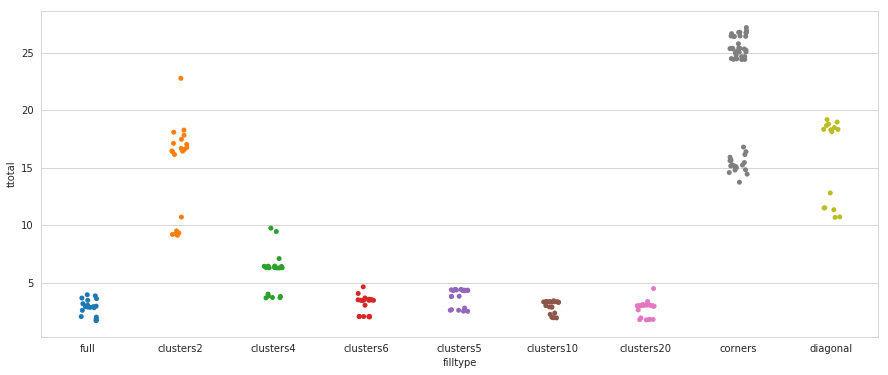

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.stripplot(
    data=df,
    x="filltype", y="ttotal",
    ax=ax)

### Bestimmung von k

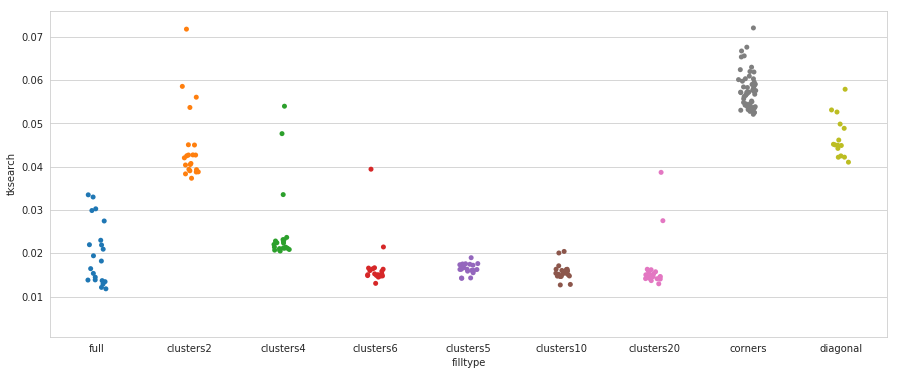

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.stripplot(
    data=df,
    x="filltype", y="tksearch",
    ax=ax)

### Fixed-radius search

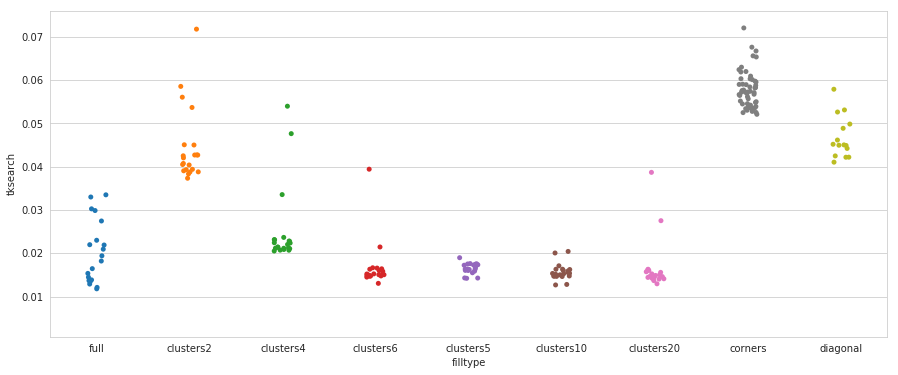

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.stripplot(
    data=df,
    x="filltype", y="tksearch",
    ax=ax)

### Vergleich der Zeit der Listenerstellung und der Suche
Beachte Achsenskalierung!

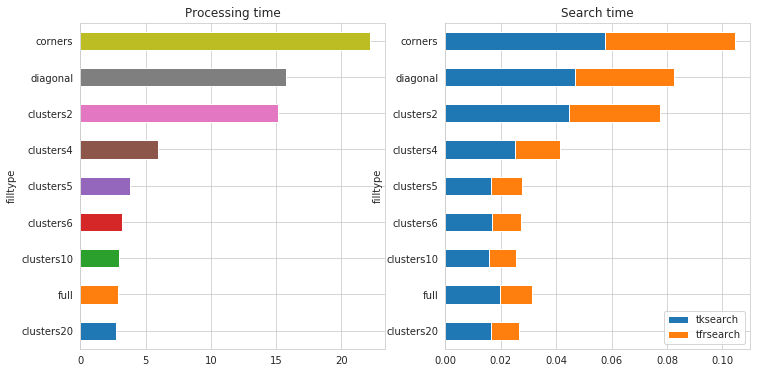

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
df.groupby('filltype').mean().sort_values('ttotal').plot(kind='barh',
                               y='ttotal',
                               legend=False,
                               title='Processing time',ax = ax1);
df.groupby('filltype').mean().sort_values('ttotal').plot(kind='barh',
                               y=['tksearch',
                                  'tfrsearch'],
                               stacked=True,
                               title='Search time',ax = ax2);

## Vergleich der Listenerstellungsmethoden

### Clusters
Starker anstieg der Gesamtlaufzeit bei weniger befüllten gebieten

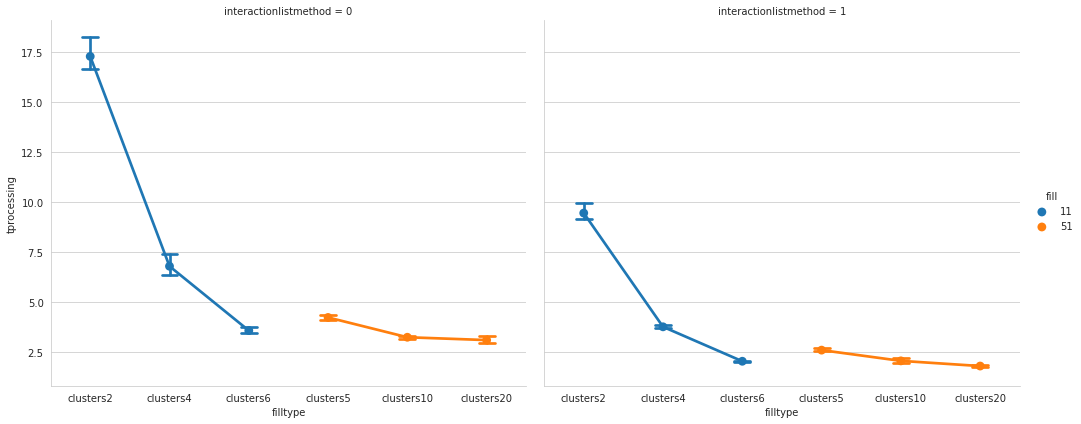

In [66]:
g = sns.catplot(
    data=df[df['filltype'].str.startswith('clusters')],
    x="filltype", y="tprocessing",
    hue="fill",
    col="interactionlistmethod",
    kind="point", capsize=.2,
    height=6, aspect=1.2)

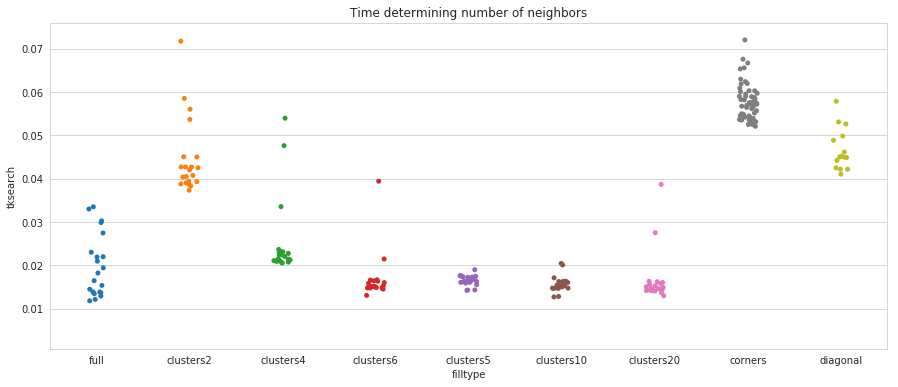

In [8]:
fig, ax = plt.subplots(figsize=(15,6))
sns.stripplot(x="filltype", y="tksearch", data=df, ax=ax)
plt.title("Time determining number of neighbors");

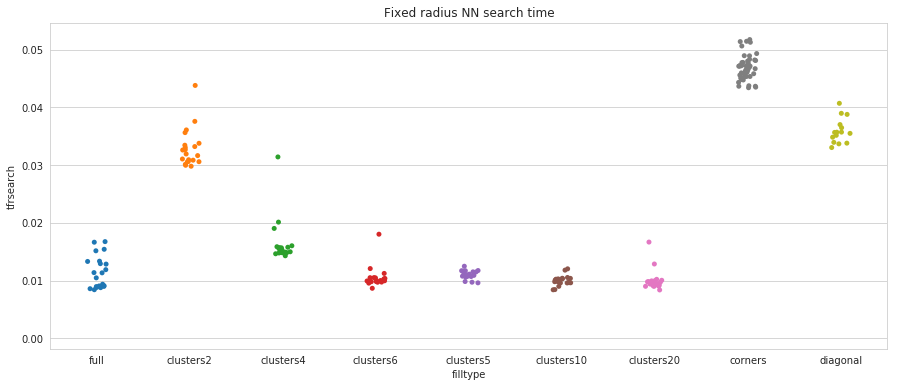

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="filltype", y="tfrsearch", data=df, ax=ax)
plt.title("Fixed radius NN search time");

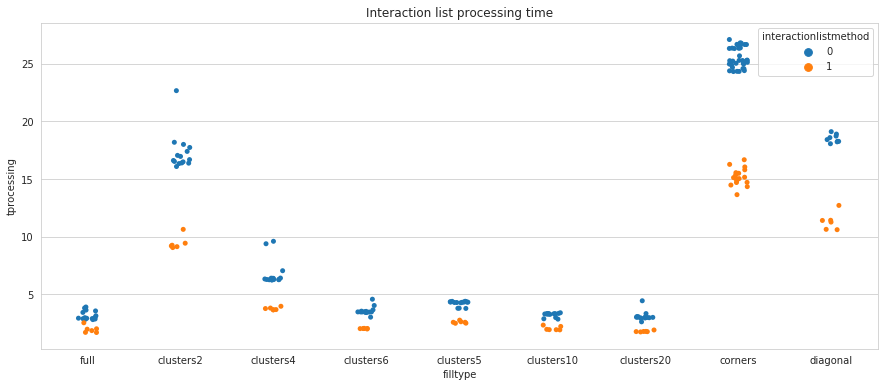

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.stripplot(x="filltype", y="tprocessing", data=df, ax=ax, hue='interactionlistmethod')
plt.title("Interaction list processing time");

In [12]:
df.groupby('filltype').mean()

,sizex,sizey,sizez,fill,ndatapts,ttotal,tksearch,tfrsearch,tprocessing,interactionlistmethod
filltype,,,,,,,,,,
clusters10,0.005,0.01,0.005,51.0,128000.0,2.932676,0.015665,0.009989,2.898532,0.285714
clusters2,0.005,0.01,0.005,11.0,27648.0,15.145057,0.044552,0.032869,15.058170,0.285714
clusters20,0.005,0.01,0.005,51.0,128000.0,2.758841,0.016524,0.009981,2.723482,0.285714
clusters4,0.005,0.01,0.005,11.0,27648.0,5.979617,0.025131,0.016390,5.925605,0.285714
clusters5,0.005,0.01,0.005,51.0,128000.0,3.796459,0.016444,0.011062,3.760313,0.285714
clusters6,0.005,0.01,0.005,11.0,27648.0,3.169042,0.016698,0.010516,3.132509,0.285714
corners,0.005,0.01,0.005,9.0,24134.0,22.187378,0.057770,0.046891,22.072943,0.333333
diagonal,0.005,0.01,0.005,11.0,29424.0,15.733680,0.046723,0.035946,15.641053,0.400000
full,0.005,0.01,0.005,100.0,250000.0,2.873837,0.019871,0.011524,2.831571,0.285714


In [14]:
df.groupby('fill').mean()

,sizex,sizey,sizez,ndatapts,ttotal,tksearch,tfrsearch,tprocessing,interactionlistmethod
fill,,,,,,,,,
2,0.005,0.01,0.005,7200.000,21.974878,0.058129,0.047584,21.859167,0.333333
11,0.005,0.01,0.005,28021.125,12.095582,0.037020,0.027561,12.020785,0.312500
14,0.005,0.01,0.005,37044.000,21.531556,0.057453,0.045789,21.418683,0.333333
51,0.005,0.01,0.005,128000.000,3.162659,0.016211,0.010344,3.127443,0.285714
100,0.005,0.01,0.005,250000.000,2.873837,0.019871,0.011524,2.831571,0.285714
